In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn import 
# from speedml import Speedml
from sklearn.preprocessing import OneHotEncoder

In [63]:
# EDA分析
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
fulldata = [train ,test]

In [64]:
train.info()
print('*'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

## 数据观察
+ PassengerId列没有实际作用，删除
+ Ticket 没有明显信息，考虑删除
+ Cabin 缺失比例过高，考虑删除
+ 有3列['Name','Sex','Embarked]为文本类型，需要进行数值化
+ Age,Embarked 存在空值 需考虑填充方式
+ Name 字段中称呼变量可供提取Title，需单独处理
+ Age,Fare 均为连续数值型变量考虑分段
+ Pclass,Age,Fare是有顺序替换，Sex无顺序替换，编码时应区分

In [65]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
722,723,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [66]:
del_cols = ['Ticket']
for dataset in combine:
    for col in del_cols:
        del dataset[col]

In [67]:
# Pclass 列不用处理
# Name列提出Title
titles = train.Name.str.extract(" ([A-Za-z]+\.)",expand=False).value_counts().index
most_titles = list(titles[train.Name.str.extract(" ([A-Za-z]+\.)",expand=False).value_counts().values > 10])
rare_titles = list(titles[train.Name.str.extract(" ([A-Za-z]+\.)",expand=False).value_counts().values <= 10])
title_map = 

SyntaxError: invalid syntax (<ipython-input-67-e1c8b1a03163>, line 6)

In [68]:
del train['PassengerId']

In [69]:
titles = train.Name.str.extract(" ([A-Za-z]+\.)",expand=False).value_counts()
titles

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Mme.           1
Lady.          1
Ms.            1
Jonkheer.      1
Capt.          1
Don.           1
Sir.           1
Countess.      1
Name: Name, dtype: int64

In [70]:
most_titles = list(titles[train.Name.str.extract(" ([A-Za-z]+\.)",expand=False).value_counts().values > 10].index)
most_titles

['Mr.', 'Miss.', 'Mrs.', 'Master.']

In [71]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(" ([A-Za-z]+\.)",expand=False)
    dataset.loc[~dataset.Title.isin(most_titles),'Title'] = 'Rare.'
train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
97,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,63.3583,D10 D12,C,Mr.
269,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,135.6333,C99,S,Miss.
749,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,7.7500,NaN,Q,Mr.
545,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,26.0000,NaN,S,Mr.
458,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,10.5000,NaN,S,Miss.
115,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,7.9250,NaN,S,Mr.
508,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,22.5250,NaN,S,Mr.
535,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,26.2500,NaN,S,Miss.
530,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26.0000,NaN,S,Miss.
653,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,7.8292,NaN,Q,Miss.


In [72]:
pd.crosstab(train['Sex'],train['Title'])

Title,Master.,Miss.,Mr.,Mrs.,Rare.
Sex,,,,,
female,0,182,0,125,7
male,40,0,517,0,20


In [73]:
title_dict = dict(zip(train.Title.unique(),[i+1 for i in range(5)]))
title_dict

{'Master.': 4, 'Miss.': 3, 'Mr.': 1, 'Mrs.': 2, 'Rare.': 5}

## Sex 和 Ttile 存在一定的关联性，可能会影响模型性能

In [74]:
for dataset in combine:
    del dataset['Name']

In [75]:
# 简单处理Age列，使用均值填充
for dataset in combine:
    dataset.Age.fillna(value=round(dataset.Age.mean()),inplace=True)
#(train.Age.mean())

In [76]:
# Age分段
for dataset in combine:
    dataset['Age_Band'] = pd.cut(dataset['Age'],8)

In [77]:
train[['Survived','Age_Band']].groupby('Age_Band').mean().sort_index()

,Survived
Age_Band,
"(0.34, 10.368]",0.593750
"(10.368, 20.315]",0.382609
"(20.315, 30.263]",0.334152
"(30.263, 40.21]",0.445161
"(40.21, 50.158]",0.383721
"(50.158, 60.105]",0.404762
"(60.105, 70.052]",0.235294
"(70.052, 80.0]",0.200000


In [78]:
for dataset in combine:
    dataset.loc[dataset.Age <= 10.368,'Age'] = 1
    dataset.loc[(dataset.Age <= 20.315) & (dataset.Age > 10.368),'Age'] = 2
    dataset.loc[(dataset.Age <= 30.263) & (dataset.Age > 20.315),'Age'] = 3
    dataset.loc[(dataset.Age <= 40.21) & (dataset.Age > 30.263),'Age'] = 4
    dataset.loc[(dataset.Age <= 50.158) & (dataset.Age > 40.21),'Age'] = 5
    dataset.loc[(dataset.Age <= 60.105) & (dataset.Age > 50.158),'Age'] = 6
    dataset.loc[(dataset.Age <= 70.052) & (dataset.Age > 60.105),'Age'] = 7
    dataset.loc[(dataset.Age <= 80) & (dataset.Age > 70.052),'Age'] = 8

train.sample(10)     

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Band
53,1,2,female,3.0,1,0,26.0000,NaN,S,Mrs.,"(20.315, 30.263]"
321,0,3,male,3.0,0,0,7.8958,NaN,S,Mr.,"(20.315, 30.263]"
117,0,2,male,3.0,1,0,21.0000,NaN,S,Mr.,"(20.315, 30.263]"
755,1,2,male,1.0,1,1,14.5000,NaN,S,Master.,"(0.34, 10.368]"
172,1,3,female,1.0,1,1,11.1333,NaN,S,Miss.,"(0.34, 10.368]"
866,1,2,female,3.0,1,0,13.8583,NaN,C,Miss.,"(20.315, 30.263]"
608,1,2,female,3.0,1,2,41.5792,NaN,C,Mrs.,"(20.315, 30.263]"
637,0,2,male,4.0,1,1,26.2500,NaN,S,Mr.,"(30.263, 40.21]"
716,1,1,female,4.0,0,0,227.5250,C45,C,Miss.,"(30.263, 40.21]"
306,1,1,female,3.0,0,0,110.8833,NaN,C,Miss.,"(20.315, 30.263]"


In [79]:
# SibSp, Parch 可以构造新特征familiy
for dataset in combine:
    dataset['Family']  = dataset['SibSp'] + dataset['Parch'] + 1

In [80]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Band,Family
0,0,3,male,3.0,1,0,7.2500,NaN,S,Mr.,"(20.315, 30.263]",2
1,1,1,female,4.0,1,0,71.2833,C85,C,Mrs.,"(30.263, 40.21]",2
2,1,3,female,3.0,0,0,7.9250,NaN,S,Miss.,"(20.315, 30.263]",1
3,1,1,female,4.0,1,0,53.1000,C123,S,Mrs.,"(30.263, 40.21]",2
4,0,3,male,4.0,0,0,8.0500,NaN,S,Mr.,"(30.263, 40.21]",1


In [81]:
for dataset in combine :
    dataset['Fare_Band'] = pd.cut(dataset['Fare'],[0,20,50,80,600],include_lowest=True)

In [82]:
train[['Survived','Fare_Band']].groupby('Fare_Band').count().sort_index()

,Survived
Fare_Band,
"(-0.001, 20.0]",515
"(20.0, 50.0]",216
"(50.0, 80.0]",86
"(80.0, 600.0]",74


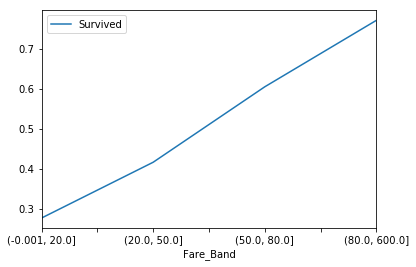

In [83]:
train[['Survived','Fare_Band']].groupby('Fare_Band').mean().sort_index().plot()

In [84]:
for dataset in combine:
    dataset.loc[(dataset.Fare >= 0) & (dataset.Fare <= 20),'Fare'] = 1
    dataset.loc[(dataset.Fare > 20) & (dataset.Fare <= 50),'Fare'] = 2
    dataset.loc[(dataset.Fare > 50) & (dataset.Fare <= 80),'Fare'] = 3
    dataset.loc[(dataset.Fare > 80) & (dataset.Fare <= 600),'Fare'] = 4

train.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Band,Family,Fare_Band
479,1,3,female,1.0,0,1,1.0,NaN,S,Miss.,"(0.34, 10.368]",2,"(-0.001, 20.0]"
75,0,3,male,3.0,0,0,1.0,F G73,S,Mr.,"(20.315, 30.263]",1,"(-0.001, 20.0]"
282,0,3,male,2.0,0,0,1.0,NaN,S,Mr.,"(10.368, 20.315]",1,"(-0.001, 20.0]"
373,0,1,male,3.0,0,0,4.0,NaN,C,Mr.,"(20.315, 30.263]",1,"(80.0, 600.0]"
731,0,3,male,2.0,0,0,1.0,NaN,C,Mr.,"(10.368, 20.315]",1,"(-0.001, 20.0]"
727,1,3,female,3.0,0,0,1.0,NaN,Q,Miss.,"(20.315, 30.263]",1,"(-0.001, 20.0]"
613,0,3,male,3.0,0,0,1.0,NaN,Q,Mr.,"(20.315, 30.263]",1,"(-0.001, 20.0]"
326,0,3,male,7.0,0,0,1.0,NaN,S,Mr.,"(60.105, 70.052]",1,"(-0.001, 20.0]"
226,1,2,male,2.0,0,0,1.0,NaN,S,Mr.,"(10.368, 20.315]",1,"(-0.001, 20.0]"
835,1,1,female,4.0,1,1,4.0,E49,C,Miss.,"(30.263, 40.21]",3,"(80.0, 600.0]"


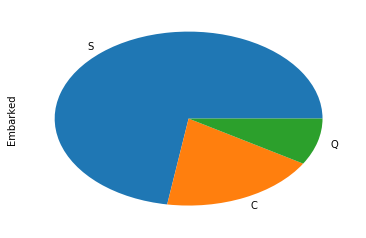

In [85]:
train.Embarked.value_counts().plot('pie')

In [86]:
for dateset in combine:
    dataset.Embarked.fillna(value='S',inplace=True)

In [87]:
train.loc[train.Embarked.isnull(),'Embarked'] = 'S'

In [88]:
embarked_dict = dict(zip(train.Embarked.unique(),[i+1 for i in range(len(train.Embarked.unique()))]))
embarked_dict 

{'C': 2, 'Q': 3, 'S': 1}

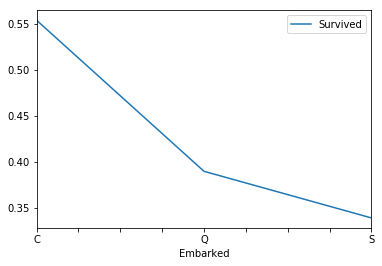

In [89]:
train[['Survived','Embarked']].groupby('Embarked').mean().plot()

In [90]:
sex_dict = dict(zip(train.Sex.unique(),[i+1 for i in range(len(train.Sex.unique()))]))
sex_dict

{'female': 2, 'male': 1}

In [91]:
#  编码
for dataset in combine:
    dataset.Sex = dataset.Sex.map(sex_dict)
    dataset.Embarked = dataset.Embarked.map(embarked_dict)
    dataset.Title = dataset.Title.map(title_dict)

In [92]:
train.info()
print('='*100)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Cabin        204 non-null object
Embarked     891 non-null int64
Title        891 non-null int64
Age_Band     891 non-null category
Family       891 non-null int64
Fare_Band    891 non-null category
dtypes: category(2), float64(2), int64(8), object(1)
memory usage: 78.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked   

In [93]:
test.loc[test.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Band,Family,Fare_Band
152,1044,3,1,7.0,0,0,NaN,NaN,1,1,"(57.043, 66.521]",1,NaN


In [94]:
train.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Age_Band,Family,Fare_Band
865,1,2,2,5.0,0,0,1.0,NaN,1,2,"(40.21, 50.158]",1,"(-0.001, 20.0]"
518,1,2,2,4.0,1,0,2.0,NaN,1,2,"(30.263, 40.21]",2,"(20.0, 50.0]"
47,1,3,2,3.0,0,0,1.0,NaN,3,3,"(20.315, 30.263]",1,"(-0.001, 20.0]"
473,1,2,2,3.0,0,0,1.0,D,2,2,"(20.315, 30.263]",1,"(-0.001, 20.0]"
454,0,3,1,3.0,0,0,1.0,NaN,1,1,"(20.315, 30.263]",1,"(-0.001, 20.0]"
173,0,3,1,3.0,0,0,1.0,NaN,1,1,"(20.315, 30.263]",1,"(-0.001, 20.0]"
680,0,3,2,3.0,0,0,1.0,NaN,3,3,"(20.315, 30.263]",1,"(-0.001, 20.0]"
360,0,3,1,4.0,1,4,2.0,NaN,1,1,"(30.263, 40.21]",6,"(20.0, 50.0]"
509,1,3,1,3.0,0,0,3.0,NaN,1,1,"(20.315, 30.263]",1,"(50.0, 80.0]"
383,1,1,2,4.0,1,0,3.0,NaN,1,2,"(30.263, 40.21]",2,"(50.0, 80.0]"


In [95]:
for dataset in combine:
    dataset.drop(['Age_Band','Fare_Band'],axis=1,inplace=True)
    
train.sample(10)    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family
150,0,2,1,6.0,0,0,1.0,NaN,1,5,1
46,0,3,1,3.0,1,0,1.0,NaN,3,1,2
257,1,1,2,3.0,0,0,4.0,B77,1,3,1
247,1,2,2,3.0,0,2,1.0,NaN,1,2,3
51,0,3,1,3.0,0,0,1.0,NaN,1,1,1
345,1,2,2,3.0,0,0,1.0,F33,1,3,1
121,0,3,1,3.0,0,0,1.0,NaN,1,1,1
136,1,1,2,2.0,0,2,2.0,D47,1,3,3
681,1,1,1,3.0,0,0,3.0,D49,2,1,1
811,0,3,1,4.0,0,0,2.0,NaN,1,1,1


In [96]:
train.Age = train.Age.astype('int')
train.Fare = train.Fare.astype('int')

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
Title          418 non-null int64
Family         418 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 36.0+ KB


In [98]:
test.loc[~test.Fare.isnull(),'Fare'].mean()

1.7218225419664268

In [99]:
test.loc[test.Fare.isnull(),'Fare'] = 1

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null int32
Embarked     891 non-null int64
Title        891 non-null int64
Family       891 non-null int64
has_Cabin    891 non-null int64
dtypes: int32(2), int64(9)
memory usage: 69.7 KB


In [105]:
for dataset in combine :
    dataset['has_Cabin'] = 1
    dataset.loc[dataset.Cabin.isnull(),'has_Cabin'] = 0
    del dataset['Cabin']


In [125]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Family', 'has_Cabin'],
      dtype='object')

## 训练模型

In [108]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop('PassengerId',axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

In [109]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [110]:


logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.25

In [111]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.280000000000001

In [112]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.530000000000001

In [113]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.549999999999997

In [114]:
pcpt = Perceptron()
pcpt.fit(X_train,Y_train)
Y_pred = pcpt.predict(X_test)
acc_perceptron = round(pcpt.score(X_train,Y_train)*100,2)
acc_perceptron

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


79.569999999999993

In [115]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.579999999999998

In [116]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


77.549999999999997

In [117]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.239999999999995

In [122]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

90.239999999999995

In [119]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,90.24
8,Decision Tree,90.24
1,KNN,86.53
0,Support Vector Machines,83.28
7,Linear SVC,80.58
2,Logistic Regression,80.25
5,Perceptron,79.57
4,Naive Bayes,77.55
6,Stochastic Gradient Decent,77.55


In [123]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [124]:
submission.to_csv('submission.csv',encoding='utf8',index=False)